<a href="https://colab.research.google.com/github/nicolasrondan/cv-um-2023/blob/main/practico-1/Practico_1_Espacios_de_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Montar Google Drive ####

In [ ]:
#@title 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/computer-vision-um/cv-um-2023/practico-1/

# **1. Introducción**

Durante el curso de Computer Vision vamos a analizar distintos algoritmos para procesar imagenes y analizar el contenido de las mismas. Para ello debemos aprender a manipular imágenes en Python. Los objectivos de este practico son los siguientes:


1.   *Estudiar la operaciones básicas de como cargar una imagen en OpenCV y visualizarlas con Matplotlib*
2.   *Vamos analizar las diferencias entre Pillow y OpenCV para cargar imágenes. Durante el curso vamos a utilizar OpenCV pero es bueno saber que existe Pillow y tiene métodos simples para cargar y manipular imágenes.* 
3. *Veremos como transformar imagenes entre espacios de color.*
4. *Veremos como manipular videos.*

Para este practico vamos a utilizar los paquetes de python:


*   [OpenCV](https://opencv.org/)
*   [Matplotlib](https://matplotlib.org/)
*   [Pillow](https://pillow.readthedocs.io/en/stable/)


### ***OpenCV***

OpenCV es una biblioteca libre de visión artificial originalmente desarrollada por Intel. OpenCV significa Open Computer Vision (Visión Artificial Abierta). Desde que apareció su primera versión alfa en el mes de enero de 1999, se ha utilizado en una gran cantidad de aplicaciones, y hasta 2020 se la sigue mencionando como la biblioteca más popular de visión artificial. Detección de movimiento, reconocimiento de objetos, reconstrucción 3D a partir de imágenes, son sólo algunos ejemplos de aplicaciones de OpenCV.

 [[Wikipedia](https://es.wikipedia.org/wiki/OpenCV)]

### ***Matplotlib***

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de MATLAB.

 [[Wikipedia](https://es.wikipedia.org/wiki/Matplotlib)]

### ***Pillow***

Pillow es una biblioteca adicional gratuita y de código abierto para el lenguaje de programación Python que agrega soporte para abrir, manipular y guardar muchos formatos de archivo de imagen diferentes. Está disponible para Windows, Mac OS X y Linux

 [[Pillow](https://es.wikipedia.org/wiki/Matplotlib)]

# **2. Trabajando con Imagenes**

En esta seccion vamos a investigar como cargar una imagen con OpenCV y Pillow, dos de los paquetes de python más utilizados para manipular imagenes. En particular Pillow tiene interfaces que permiten manipular imagenes de manera simple. Por otro lado OpenCV permite cargar imagenes, manipularlas y aplicar algoritmos de procesamiento de imagenes y computer vision.

Para visualizar las imagenes vamos a usar Matplotlib


### **2.1** Importar paquetes necesarios

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

### **2.2** Cargar Imagenes con OpenCV y Pillow 

Abrir la imagen *'images/um.png'* utilizando la función **imread** de OpenCV y la función **open** de Pillow

```
image_opencv = cv2.imread(<path>)
image_pillow = Image.open(<path>)
```

In [ ]:
### Your Code ####

### **2.3** Visualizar Imagenes

Una de las diferencias al cargar imagenes en ambas librerias es que OpenCV carga las imagenes en formato **BGR** y PIL carga las imagenes en el formato habitual **RGB**. Verifiquemos esto visualizando las imagenes con Matplotlib.

In [ ]:
# Para visualizar una imagen de Pillow en Colab simplemente ponemos el nombre de nuestro objeto imagen y visualizamos la salida
# img_pil 

OpenCV cuenta con la funcion *imshow* para visualizar imagenes. Sin embargo 
esta función no funciona en el entorno de goolge colab. Podemos importar la siguiente funcion para visualizar una imagen. 

```
from google.colab.patches import cv2_imshow
```

Visualizar la imagen utilizando la función *cv2_imshow*

In [ ]:
from google.colab.patches import cv2_imshow
### Your Code ####

Por otro lado podemos utilizar Matplotlib para visualizar cualiquier de las imagenes anteriores utilizando la funcion [imshow](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib.

```
plt.imshow(image)
plt.show()
```

Visualizar ambas imagenes con Matplotlib y verificar la diferencia en el espacio de color.

In [ ]:
### Your Code ####

### **2.4** Atributos de una Imagen ###
En OpenCV  podemos solamente verificar el tamaño de una imagen y el tipo de datos que contiene ya que la imagen esta representada por un array. Para ello podemos utilizar los atributos shape y dtype.



```
image.shape
image.dtype
```

En Pillow podemos saber el espacio de color de la imagen utilizando la funcion getbands() o el atributo mode. Ademas podemos saber el tamaño de la imagen utilizando el atributo size.



```
image.getbands()
image.mode
image.size
```

Visualizar los atributos de las imagenes.

In [ ]:
### Your Code ####

#### 2.4.1 Tipo de Datos #####

Los dos tipos de datos más cómunes que vamos a encontrar en una imagen son `uint8` y `float32`. En el primer caso son imagenes donde los valores RGB son enteros en el rango `[0,255]` y en el segundo caso los valores RGB van a ser números de punto flotante (*float*) en el rango `[0,1]`. Para convertir una imagen de entero a punto flotante se puede utilizar el siguiente código.



```
image_float = image_int / 255.
```

Convertir la imagen de opencv a punto flotante y visualizar ambas imágenes con matplotlib para corroborar que se trata de la misma imagén representada de manera distinta.

In [ ]:
### Your Code ####

##  **2.5** Sistema de coordenadas ###


PIL utiliza un sistema de coordenadas de píxeles cartesiano, con `(0,0)` en la esquina superior izquierda. 

OpenCV utiliza el mismo sistema de coordenadas ya que representa las imagenes como martices y el índice (0,0) corresponde al valor superior a la izquierda.

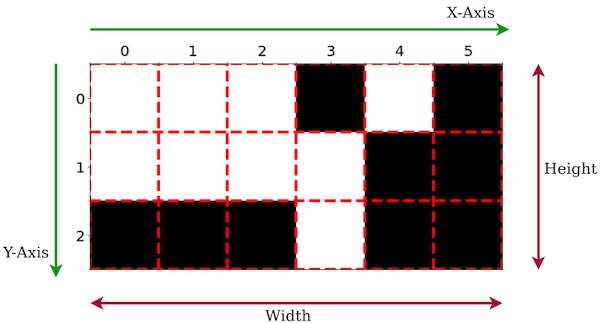


[Source](https://lionbridge.ai/articles/learning-the-opencv-and-numpy-image-coordinate-systems/)


**Es necesario saber el sistema de coordenadas en que trabaja cadad libreria para poder utilizar las funciones de manera adecuada*

**DURANTE EL CURSO VAMOS A TRABAJAR CON OPENCV PERO ES UTIL SABER QUE EXISTE PIL y TAMBIEN LO PUEDEN USAR**
__________________________________________________________________________
**A PARTIR DE ESTE MOMENTO VAMOS A HACER TODO EN OPENCV**



# **3. Espacios de Color**

### **3.1** Imagenes RGB ###

Al consultar el parametro shape de la imagen de openCV que nos indica que la imagen es de _800×800×3_. Esto significa que la imagen de es de 800 píxeles de alto por 800 de ancho  y tiene tres canales profundidad. Estos canales almacenan los colores: _red_ (R), _gree_ (G) y _blue_ (B). Cada valor de pixel en la imagen está en el rango `0-255`. Para acceder a cada una de las dimensiones de color se puede utilizar los operadores de indexado de numpy. 


```
R = image_opencv[:,:,2]
G = image_opencv[:,:,1]
B = image_opencv[:,:,0]

```

Recordemos que opencv trabaja en BGR



Matplotlib nos permite armar grillas de graficas e imágenes utilizando la funcion subplots. Utilizar la funcion [subplots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) para armar una grilla de _2x2_ donde se muestre la imagen original y las 3 componentes color como en la siguiente imagen:




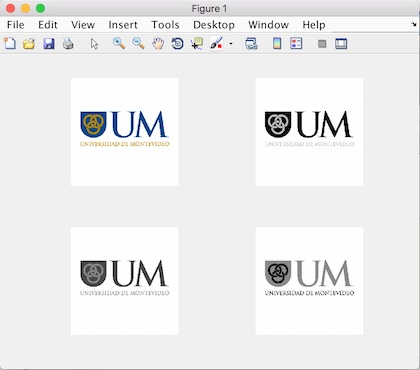



### **3.2** Otros espacios de Color *HSV, LAB* 

Una herramienta importante en algoritmos de computer vision es poder convertir imágenes entre espacios de color. En general dependiendo del tipo de problema al que nos enfrentemos puede ser más fácil resolverlo en el espacio HSV o LAB. 

Para ello OpenCV cuenta con la función [cvtColor](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html), la cual toma una imagen de entrada y código de conversión de color de la siguiente manera:

```
	image_out	=	cv2.cvtColor(image_source, code)
```

Los códigos de conversión de color se pueden encontrar en la documentación de la función.

En OpenCV una de las conversiones más comunes es convertir una imagen de **BGR** a **RGB**. A modo de ejemplo esto se puede hacer con la función [cvtColor](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html) de las siguiente manera:



```
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGBA)
```

#### **3.2.1** Convertir la imagen de entrada a RGB y visualizarla

In [ ]:
### Your Code ####

#### **3.2.2** HSV, LAB, GRAYSCALE

Escribir código para convertir la imagen original a los espaciós de color HSV, Grayscale y LAB. Utilizando Matplotlib armar una imagen de salida como la que se muestra a continuación:

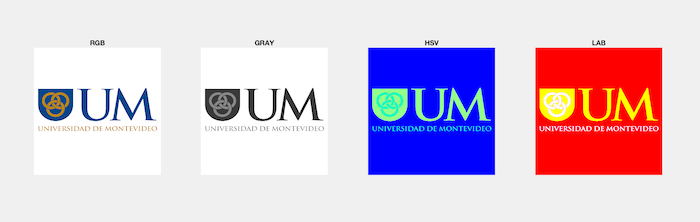


In [ ]:
### Your Code ####

### **3.2.3** Convertir a BGR utilizando el operador de indexación en arrays

# **4. Manipular videos**

En la siguiente sección vamos a aprender a manipular videos. En OpenCV se puede leer un video con la clase [VideoCapture](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html). En google colab no es posible visualizar videos correctamente usando python pero el codigo para abrir un video y reproducirlo es el siguiente:



```
import numpy as np
import cv2

capture = cv2.VideoCapture('vtest.avi')

while(capture.isOpened()):
    ret, frame = cap.read()

    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()
```



En este caso vamos a utilizar el siguiente snippet para reproducir un video:

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./images/xylophonempg.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## 4.1 Convertir un video y guardarlo ##

En esta sección se pide utilizar la clases [VideoCapture](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html)  y [VideoWriter](https://docs.opencv.org/3.4/dd/d9e/classcv_1_1VideoWriter.html) la función cvtColor y para leer un video pasarlo a grayscale y guardarlo en un archivo nuevo. Verificar que el video se haya guardado correctamente utilizando el snippet de código anterior.

In [ ]:
capture = cv2.VideoCapture('./images/xylophonempg.mp4')

frame_width = int(capture.get(3))
frame_height = int(capture.get(4))
fps = capture.get(cv2.CAP_PROP_FPS)


print(f'Procesing video with resoltion {frame_width}x{frame_height}')
print('Video Frame rate {:.3f} FPS'.format(fps)) 


out = cv2.VideoWriter('./images/xylophonempg-gray.avi',cv2.VideoWriter_fourcc('M','J','P','G'), fps , (frame_width,frame_height),isColor=False)

frame_count = 0
while(capture.isOpened()):
  ret, frame = cap.read()

  if ret == True: 
    
    frame_count += 1
    ### Your Code ####
    out.write(gray_frame)
  else:
    break

out.release()
capture.release()
cv2.destroyAllWindows()

print(f'Converted {frame_count} Frames')

In [ ]:
### Si el video no se visualiza pueden descargarlo y comprobar que haya quedado bien procesado ####
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./images/xylophonempg-gray.avi','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)